In [47]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/Police_Incidents_Final.csv')
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])
df['Date_by_Month'] = df.apply(lambda x: datetime.datetime(x['Year'],x['Month'], 1), axis = 1)
open_date = datetime.datetime(2016, 5, 20)

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
df.head()

(108587, 19)


,Incident Number,Date Occurred,UCR,UCR Description,Location,Gang Related,Latitude,Longitude,Map Point,Line_Open,Month,Year,Day_Of_Week,Day_Delta,UCR Level 2,UCR Level 1,one_mile,half_mile,Date_by_Month
0,090033416,2009-04-02,1823,Narco Possess-Synthetic,1600BLK OCEAN FRONT WALK,False,34.010298,-118.495739,"(34.0102977457032, -118.495738552074)",False,4,2009,3,-2605,Narcotics,Non-Violent,1,1,2009-04-01
1,090034125,2009-04-03,2300,Public Intoxication,STEWART ST / PICO BLVD,False,34.024252,-118.460508,"(34.0242518901242, -118.460507893009)",False,4,2009,4,-2604,Public Intoxication,Non-Violent,1,0,2009-04-01
2,090034163,2009-04-03,1822,Narco Possess-Marijuana,500BLK LINCOLN BLVD,False,34.029983,-118.503646,"(34.0299830211087, -118.503646242239)",False,4,2009,4,-2604,Narcotics,Non-Violent,0,0,2009-04-01
3,090034227,2009-04-04,2300,Public Intoxication,26TH ST / SANTA MONICA BLVD,False,34.033306,-118.474302,"(34.0333062753406, -118.474302319364)",False,4,2009,5,-2603,Public Intoxication,Non-Violent,1,0,2009-04-01
4,090034245,2009-04-04,1400,Vandalism,100BLK KINNEY ST,False,33.998859,-118.480934,"(33.9988589911957, -118.480933903635)",False,4,2009,5,-2603,Vandalism,Non-Violent,0,0,2009-04-01


### Crime Types

In [4]:
df['UCR Level 1'].value_counts()

Non-Violent        93083
Violent            14595
Other / Unknown      909
Name: UCR Level 1, dtype: int64

In [5]:
df['UCR Level 2'].value_counts()

Larceny                         30627
Public Intoxication             11956
Assault                          8867
Vandalism                        8562
Burglary                         7169
Fraud                            6292
GTA                              4121
Contempt of Court                3564
DUI                              3362
Narcotics                        3308
Agg Assault                      2740
Municipal Code Violation         2544
Robery                           1924
Possess                          1809
Trespass/Illegal Entry           1535
Family Offenses                  1364
Forgery/Counterfeit              1360
Sex Offenses                     1054
Disorderly Conduct                846
Vagrancy                          814
Other                             779
Recv/Poss Stolen Property         578
Misappropriation of Property      492
Liquor Law Violations             417
Weapons                           415
Viol of Regulatory Laws           389
Embezzlement

### Time Trends

#### Day of Week

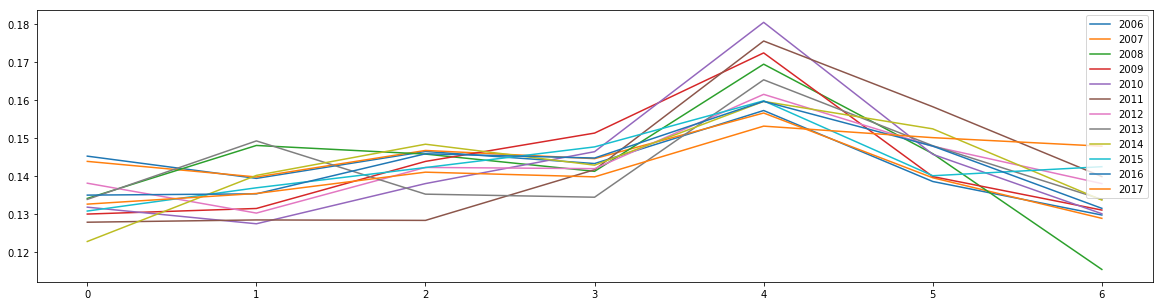

In [6]:
plt.figure(figsize=(20, 5))
for i in range(2006, 2018):
    dow = df[df['Year'] == i].groupby('Day_Of_Week')['Day_Of_Week'].count() / df[df['Year'] == i].shape[0]
    plt.plot(dow.index, dow, label = i)
plt.legend()
plt.show()

#### Overall Crime

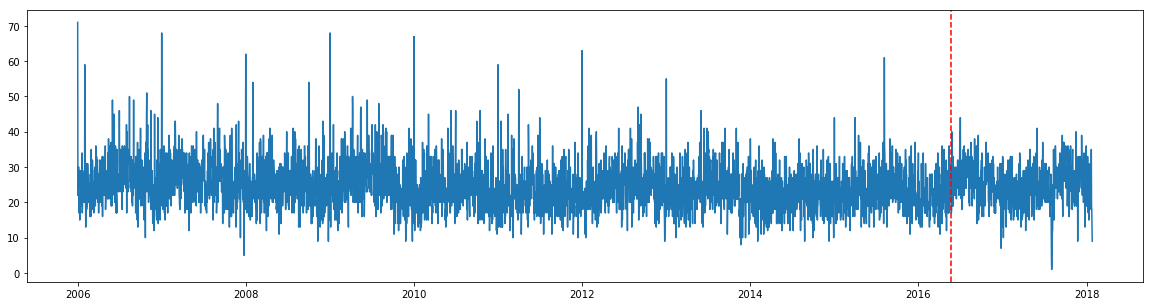

In [7]:
plt.figure(figsize=(20, 5))
all_dates = df.groupby('Date Occurred')['Date Occurred'].count()
plt.plot(all_dates.index, all_dates)
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

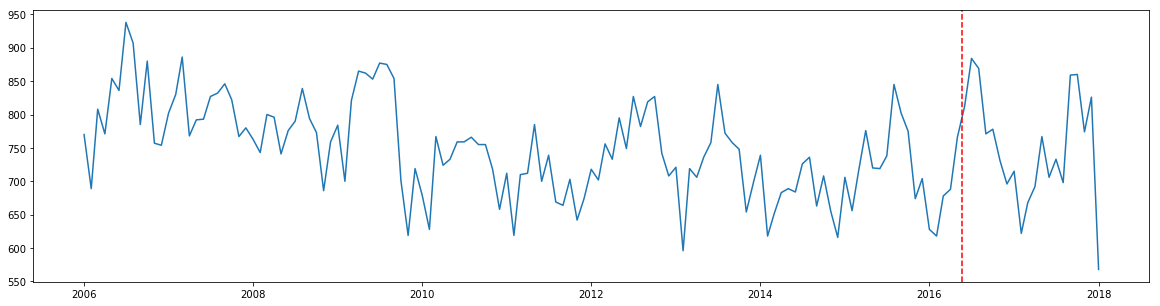

In [8]:
plt.figure(figsize=(20, 5))
all_months = df.groupby('Date_by_Month')['Date_by_Month'].count()
plt.plot(all_months.index, all_months)
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

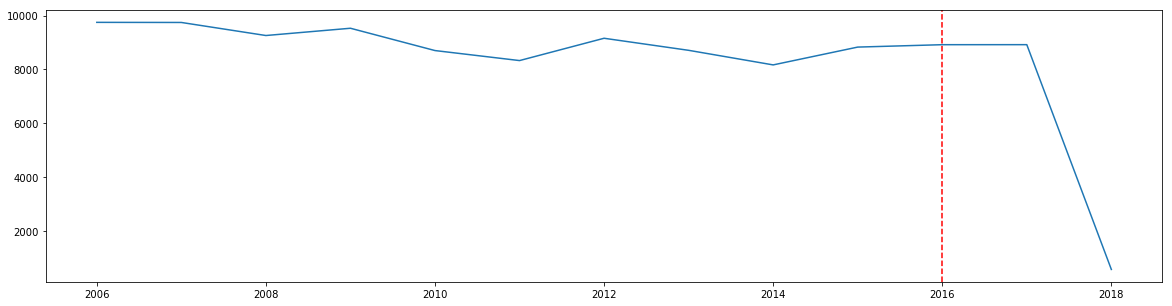

In [9]:
plt.figure(figsize=(20, 5))
all_years = df.groupby('Year')['Year'].count()
plt.plot(all_years.index, all_years)
plt.axvline(x = 2016, c = 'r', ls = '--')
plt.show()

In [10]:
def create_timseries(df_main, column = None, value = None, window = 90, return_df = False):
    if column is not None:
        df = df_main[df_main[column] == value]
    else:
        df = df_main.copy()
    raw = df.groupby('Date Occurred')['Date Occurred'].count()
    rolling = raw.rolling(window).mean()
    if return_df:
        return rolling
    else:
        return plt.plot(rolling.index, rolling, label = value)

Clear seasonality, with the increase, between september and december

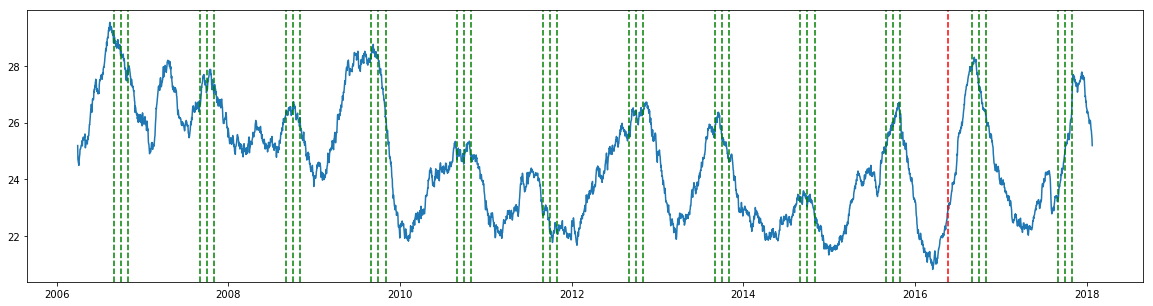

In [11]:
plt.figure(figsize=(20, 5))
create_timseries(df)
plt.axvline(x = open_date, c = 'r', ls = '--')
for i in range(2006, 2018):
    for j in range(9, 12):
        plt.axvline(x = datetime.datetime(i, j, 1), c = 'g', ls = '--')
plt.show()

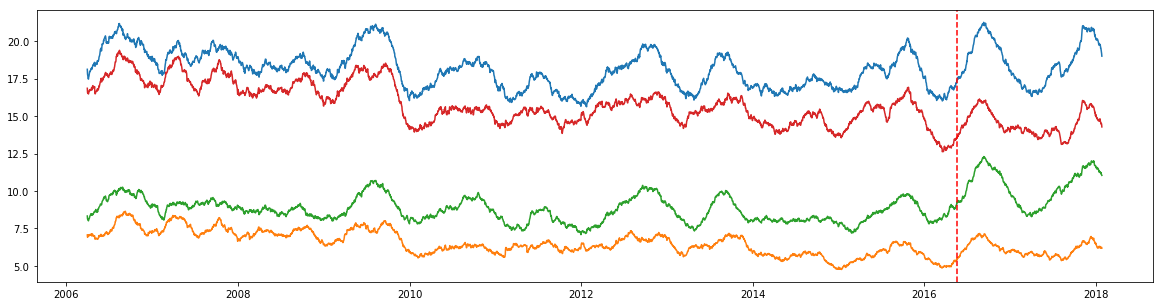

In [12]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'one_mile', 1)
create_timseries(df, 'one_mile', 0)
create_timseries(df, 'half_mile', 1)
create_timseries(df, 'half_mile', 0)
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

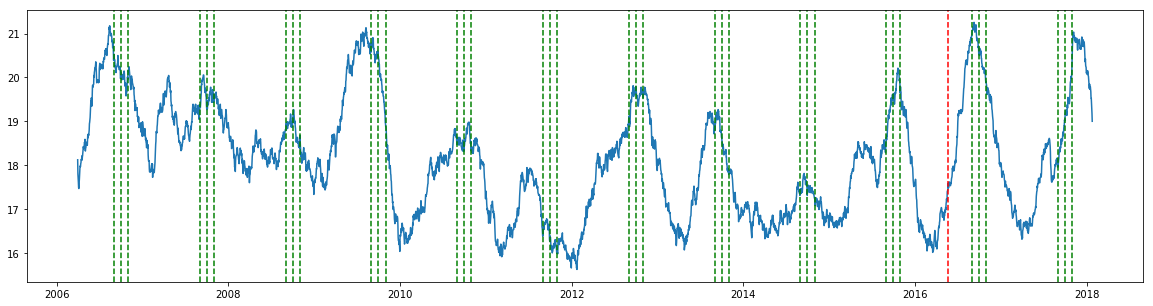

In [13]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'one_mile', 1)
plt.axvline(x = open_date, c = 'r', ls = '--')
for i in range(2006, 2018):
    for j in range(9, 12):
        plt.axvline(x = datetime.datetime(i, j, 1), c = 'g', ls = '--')
plt.show()

#### UCR Level 1

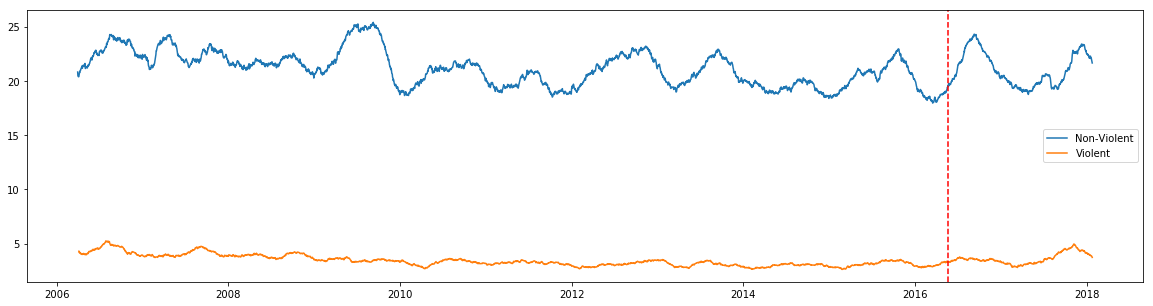

In [14]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'UCR Level 1', 'Non-Violent')
create_timseries(df, 'UCR Level 1', 'Violent')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend()
plt.show()

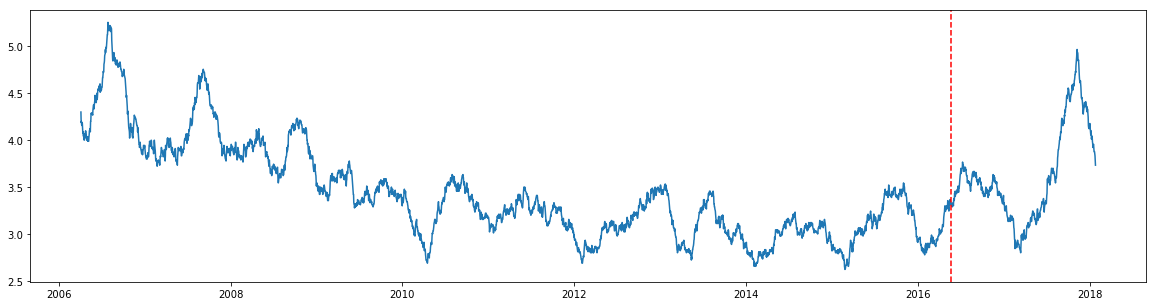

In [15]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'UCR Level 1', 'Violent')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

#### UCR Level 2

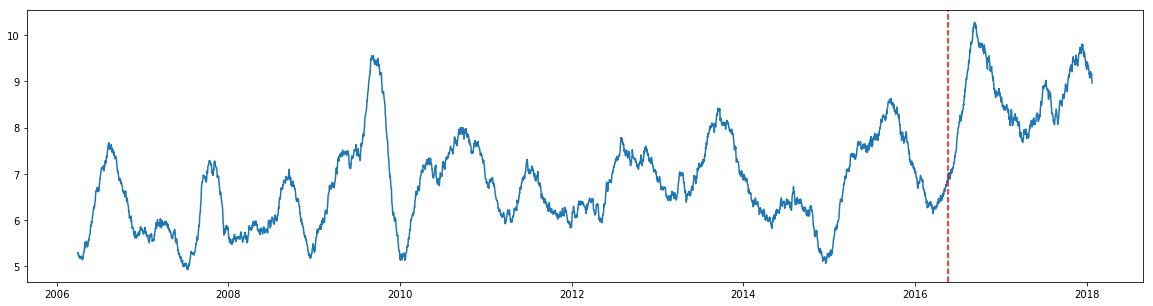

In [16]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'UCR Level 2', 'Larceny')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

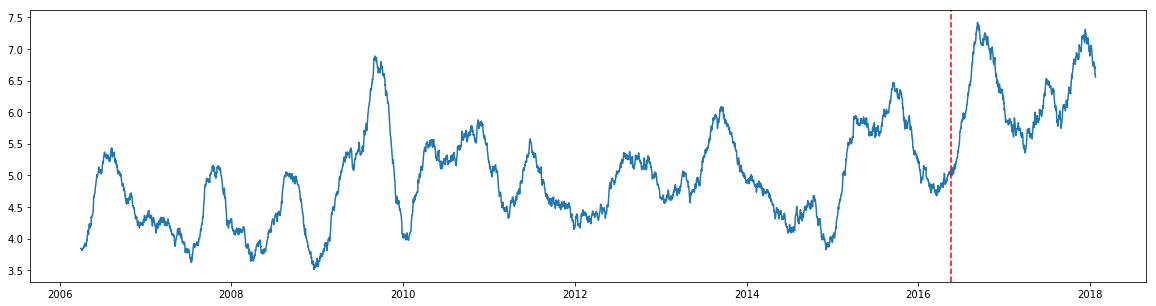

In [17]:
plt.figure(figsize=(20, 5))
create_timseries(df[df['one_mile'] == 1], 'UCR Level 2', 'Larceny')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

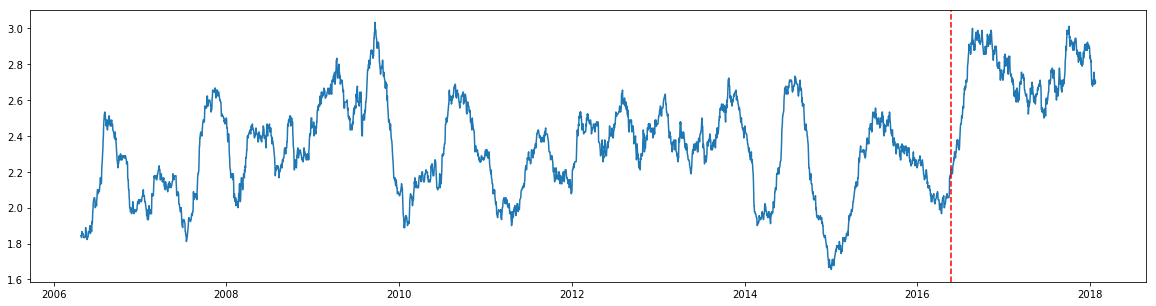

In [18]:
plt.figure(figsize=(20, 5))
create_timseries(df[df['one_mile'] == 0], 'UCR Level 2', 'Larceny')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

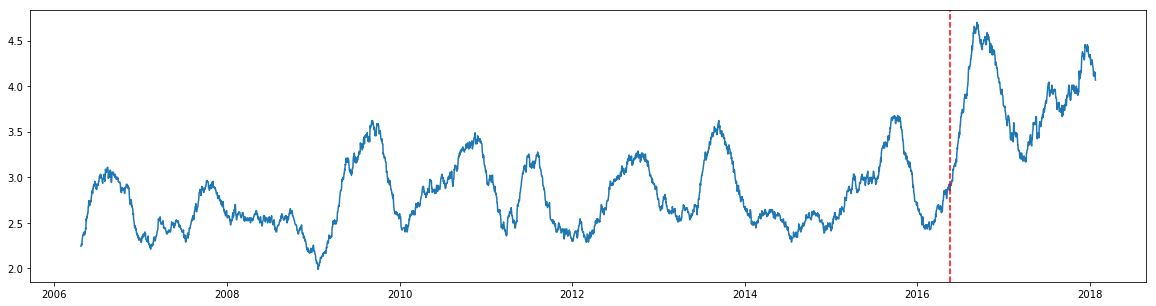

In [19]:
plt.figure(figsize=(20, 5))
create_timseries(df[df['half_mile'] == 1], 'UCR Level 2', 'Larceny')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

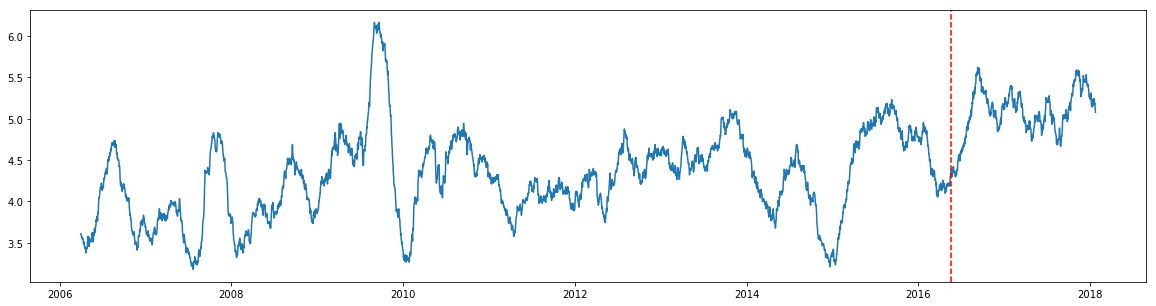

In [20]:
plt.figure(figsize=(20, 5))
create_timseries(df[df['half_mile'] == 0], 'UCR Level 2', 'Larceny')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.show()

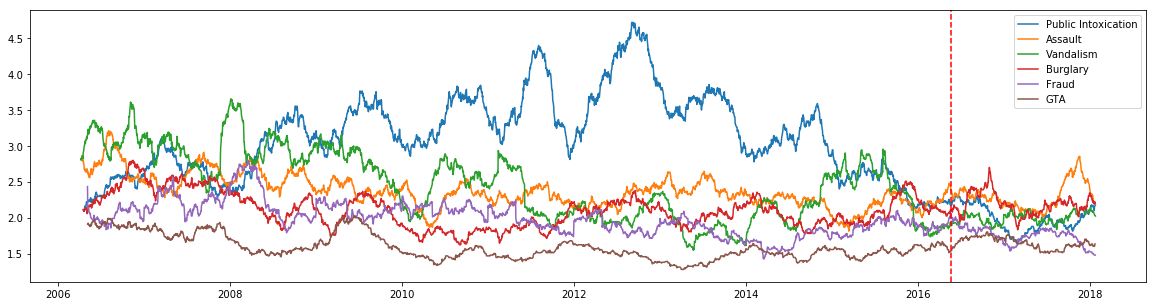

In [21]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'UCR Level 2', 'Public Intoxication')
create_timseries(df, 'UCR Level 2', 'Assault')
create_timseries(df, 'UCR Level 2', 'Vandalism')
create_timseries(df, 'UCR Level 2', 'Burglary')
create_timseries(df, 'UCR Level 2', 'Fraud')
create_timseries(df, 'UCR Level 2', 'GTA')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend()
plt.show()

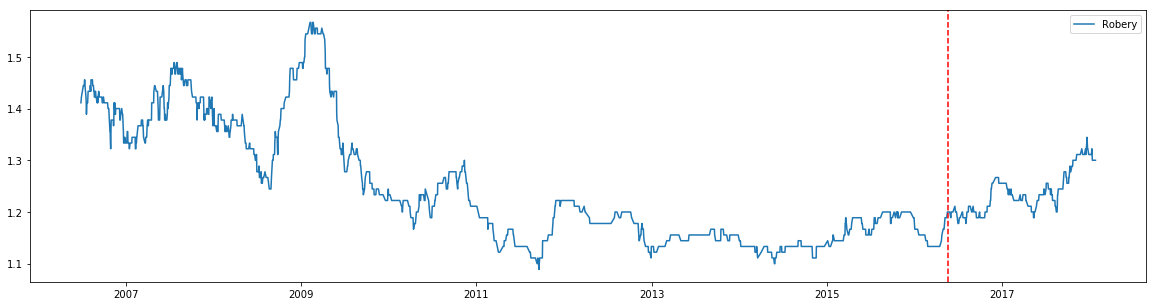

In [22]:
plt.figure(figsize=(20, 5))
create_timseries(df, 'UCR Level 2', 'Robery')
plt.axvline(x = open_date, c = 'r', ls = '--')
plt.legend()
plt.show()

Overall, the increase in larceny looks like the story here

#### Generate Data for Website Plot

In [78]:
output_df = create_timseries(df, 'UCR Level 2', 'Larceny', return_df=True)
output_df = pd.DataFrame(output_df)
output_df.columns = ['Larceny - Full']

output_df['Larceny - HalfMile'] = create_timseries(df[df['half_mile'] == 1], 'UCR Level 2', 'Larceny', return_df=True)
output_df['Larceny - OneMile'] = create_timseries(df[df['one_mile'] == 1], 'UCR Level 2', 'Larceny', return_df=True)

output_df['All - Full'] = create_timseries(df, return_df=True)
output_df['All - HalfMile'] = create_timseries(df[df['half_mile'] == 1], return_df=True)
output_df['All - OneMile'] = create_timseries(df[df['one_mile'] == 1], return_df=True)

In [79]:
output_df = output_df[output_df['Larceny - Full'].notnull()]
output_df.fillna(method='bfill', inplace=True)
scaler = MinMaxScaler()
for column in output_df.columns:
    output_df[column] = scaler.fit_transform(output_df[column])
output_df.reset_index(inplace= True)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

In [82]:
output_df.to_csv('./docs/data/timeline/timeline-data.csv', index = False)